In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [18]:
df = pd.read_csv('active_licenses_census_tract_cleaned.csv')
df


,DCA.License.Number,License.Type,License.Expiration.Date,License.Status,License.Creation.Date,Industry,Business.Name,Business.Name.2,Address.Building,Address.Street.Name,...,BIN,BBL,NTA,Census.Tract,Detail,Longitude,Latitude,Location,census_code,census_tract
0,1178405-DCA,Business,12/31/2023,Active,08/27/2004,Tobacco Retail Dealer,OLSEN NEWS CORP.,NaN,NaN,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,-73.986865,40.754317,"(40.75431708865135, -73.98686541972873)",3.606101e+14,11300
1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,...,4012858.0,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)",3.608101e+14,14100
2,1217359-DCA,Business,12/31/2023,Active,01/11/2006,Tobacco Retail Dealer,"FLEUR, RONY ST",RON'S DELI GROCERY STORE,17024,JAMAICA AVE,...,4217486.0,4.102120e+09,QN61,444.0,NaN,-73.789284,40.707291,"(40.70729121951161, -73.7892842185725)",3.608104e+14,44400
3,1435239-DCA,Business,12/31/2023,Active,06/22/2012,Tobacco Retail Dealer,PRESBYTERIAN 164 DELI CORP.,NaN,1081,SAINT NICHOLAS AVE,...,1062937.0,1.021220e+09,MN36,245.0,NaN,-73.940020,40.837602,"(40.83760200533997, -73.94001991132355)",3.606102e+14,24500
4,2045066-1-DCA,Business,12/31/2023,Active,10/26/2016,Tobacco Retail Dealer,A & M DELI & GRILL INC,NaN,13202,JAMAICA AVE,...,4196340.0,4.093400e+09,QN54,14202.0,NaN,-73.820497,40.702110,"(40.70210984823282, -73.82049747055868)",3.608101e+14,14202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,2115065-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,BRUCKNER EXPRESSWAY INC.,NaN,1419,BRUCKNER BLVD,...,2023319.0,2.037080e+09,NaN,NaN,NaN,-73.882953,40.823223,"(40.82322255964534, -73.88295261067725)",3.600501e+14,5200
4366,1428271-DCA,Business,12/31/2023,Active,05/07/2012,Tobacco Retail Dealer,"FAMILY DOLLAR STORES OF NEW YORK, INC.",FAMILY DOLLAR #6368,887,E NEW YORK AVE,...,3331592.0,3.014300e+09,BK60,880.0,NaN,-73.933365,40.662651,"(40.66265090040348, -73.93336484600341)",3.604709e+14,88001
4367,2115058-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,"JUNIORS GOURMET DELI, JUICE BAR, & SMOKE SHOP ...",NaN,1181,BEDFORD AVE,...,3329696.0,3.018270e+09,NaN,NaN,NaN,-73.953835,40.683024,"(40.6830244295472, -73.95383474133375)",3.604702e+14,24500
4368,2013634-1-DCA,Business,12/31/2023,Active,09/18/2014,Tobacco Retail Dealer,TRIDEV PETROLEUM INC,GULF,755,PENNSYLVANIA AVE,...,3097326.0,3.043230e+09,BK82,1104.0,NaN,-73.891155,40.659270,"(40.65927007183555, -73.89115522506118)",3.604711e+14,110400


In [19]:
df['census_code'].isna().sum()

0

In [20]:
df['census_code'] = df['census_code'].astype(int)
df

,DCA.License.Number,License.Type,License.Expiration.Date,License.Status,License.Creation.Date,Industry,Business.Name,Business.Name.2,Address.Building,Address.Street.Name,...,BIN,BBL,NTA,Census.Tract,Detail,Longitude,Latitude,Location,census_code,census_tract
0,1178405-DCA,Business,12/31/2023,Active,08/27/2004,Tobacco Retail Dealer,OLSEN NEWS CORP.,NaN,NaN,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,-73.986865,40.754317,"(40.75431708865135, -73.98686541972873)",360610113001007,11300
1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,...,4012858.0,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)",360810141002006,14100
2,1217359-DCA,Business,12/31/2023,Active,01/11/2006,Tobacco Retail Dealer,"FLEUR, RONY ST",RON'S DELI GROCERY STORE,17024,JAMAICA AVE,...,4217486.0,4.102120e+09,QN61,444.0,NaN,-73.789284,40.707291,"(40.70729121951161, -73.7892842185725)",360810444001000,44400
3,1435239-DCA,Business,12/31/2023,Active,06/22/2012,Tobacco Retail Dealer,PRESBYTERIAN 164 DELI CORP.,NaN,1081,SAINT NICHOLAS AVE,...,1062937.0,1.021220e+09,MN36,245.0,NaN,-73.940020,40.837602,"(40.83760200533997, -73.94001991132355)",360610245001001,24500
4,2045066-1-DCA,Business,12/31/2023,Active,10/26/2016,Tobacco Retail Dealer,A & M DELI & GRILL INC,NaN,13202,JAMAICA AVE,...,4196340.0,4.093400e+09,QN54,14202.0,NaN,-73.820497,40.702110,"(40.70210984823282, -73.82049747055868)",360810142021005,14202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,2115065-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,BRUCKNER EXPRESSWAY INC.,NaN,1419,BRUCKNER BLVD,...,2023319.0,2.037080e+09,NaN,NaN,NaN,-73.882953,40.823223,"(40.82322255964534, -73.88295261067725)",360050052001002,5200
4366,1428271-DCA,Business,12/31/2023,Active,05/07/2012,Tobacco Retail Dealer,"FAMILY DOLLAR STORES OF NEW YORK, INC.",FAMILY DOLLAR #6368,887,E NEW YORK AVE,...,3331592.0,3.014300e+09,BK60,880.0,NaN,-73.933365,40.662651,"(40.66265090040348, -73.93336484600341)",360470880011000,88001
4367,2115058-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,"JUNIORS GOURMET DELI, JUICE BAR, & SMOKE SHOP ...",NaN,1181,BEDFORD AVE,...,3329696.0,3.018270e+09,NaN,NaN,NaN,-73.953835,40.683024,"(40.6830244295472, -73.95383474133375)",360470245002000,24500
4368,2013634-1-DCA,Business,12/31/2023,Active,09/18/2014,Tobacco Retail Dealer,TRIDEV PETROLEUM INC,GULF,755,PENNSYLVANIA AVE,...,3097326.0,3.043230e+09,BK82,1104.0,NaN,-73.891155,40.659270,"(40.65927007183555, -73.89115522506118)",360471104002002,110400


In [21]:
df['census_code'] = df['census_code'].astype(str)
df

,DCA.License.Number,License.Type,License.Expiration.Date,License.Status,License.Creation.Date,Industry,Business.Name,Business.Name.2,Address.Building,Address.Street.Name,...,BIN,BBL,NTA,Census.Tract,Detail,Longitude,Latitude,Location,census_code,census_tract
0,1178405-DCA,Business,12/31/2023,Active,08/27/2004,Tobacco Retail Dealer,OLSEN NEWS CORP.,NaN,NaN,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,-73.986865,40.754317,"(40.75431708865135, -73.98686541972873)",360610113001007,11300
1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,...,4012858.0,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)",360810141002006,14100
2,1217359-DCA,Business,12/31/2023,Active,01/11/2006,Tobacco Retail Dealer,"FLEUR, RONY ST",RON'S DELI GROCERY STORE,17024,JAMAICA AVE,...,4217486.0,4.102120e+09,QN61,444.0,NaN,-73.789284,40.707291,"(40.70729121951161, -73.7892842185725)",360810444001000,44400
3,1435239-DCA,Business,12/31/2023,Active,06/22/2012,Tobacco Retail Dealer,PRESBYTERIAN 164 DELI CORP.,NaN,1081,SAINT NICHOLAS AVE,...,1062937.0,1.021220e+09,MN36,245.0,NaN,-73.940020,40.837602,"(40.83760200533997, -73.94001991132355)",360610245001001,24500
4,2045066-1-DCA,Business,12/31/2023,Active,10/26/2016,Tobacco Retail Dealer,A & M DELI & GRILL INC,NaN,13202,JAMAICA AVE,...,4196340.0,4.093400e+09,QN54,14202.0,NaN,-73.820497,40.702110,"(40.70210984823282, -73.82049747055868)",360810142021005,14202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,2115065-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,BRUCKNER EXPRESSWAY INC.,NaN,1419,BRUCKNER BLVD,...,2023319.0,2.037080e+09,NaN,NaN,NaN,-73.882953,40.823223,"(40.82322255964534, -73.88295261067725)",360050052001002,5200
4366,1428271-DCA,Business,12/31/2023,Active,05/07/2012,Tobacco Retail Dealer,"FAMILY DOLLAR STORES OF NEW YORK, INC.",FAMILY DOLLAR #6368,887,E NEW YORK AVE,...,3331592.0,3.014300e+09,BK60,880.0,NaN,-73.933365,40.662651,"(40.66265090040348, -73.93336484600341)",360470880011000,88001
4367,2115058-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,"JUNIORS GOURMET DELI, JUICE BAR, & SMOKE SHOP ...",NaN,1181,BEDFORD AVE,...,3329696.0,3.018270e+09,NaN,NaN,NaN,-73.953835,40.683024,"(40.6830244295472, -73.95383474133375)",360470245002000,24500
4368,2013634-1-DCA,Business,12/31/2023,Active,09/18/2014,Tobacco Retail Dealer,TRIDEV PETROLEUM INC,GULF,755,PENNSYLVANIA AVE,...,3097326.0,3.043230e+09,BK82,1104.0,NaN,-73.891155,40.659270,"(40.65927007183555, -73.89115522506118)",360471104002002,110400


In [15]:
len(df['census_code'][0])

15

In [22]:
#group by census tract and sum the number of active licenses
df['census_code'].value_counts().sort_values(ascending=False)

census_code
360610115001001    10
360610101001000     5
360850291044002     5
360610109001005     5
360610015021000     4
                   ..
360471194001001     1
360810285003000     1
360050153001006     1
360810779051004     1
360471104002002     1
Name: count, Length: 3729, dtype: int64

In [23]:
# remove last 4 digits of census code
df['GEOID'] = df['census_code'].apply(lambda x: x[:-4])
df.head()

,DCA.License.Number,License.Type,License.Expiration.Date,License.Status,License.Creation.Date,Industry,Business.Name,Business.Name.2,Address.Building,Address.Street.Name,...,BBL,NTA,Census.Tract,Detail,Longitude,Latitude,Location,census_code,census_tract,GEOID
0,1178405-DCA,Business,12/31/2023,Active,08/27/2004,Tobacco Retail Dealer,OLSEN NEWS CORP.,NaN,NaN,BROADWAY,...,NaN,NaN,NaN,NaN,-73.986865,40.754317,"(40.75431708865135, -73.98686541972873)",360610113001007,11300,36061011300
1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,...,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)",360810141002006,14100,36081014100
2,1217359-DCA,Business,12/31/2023,Active,01/11/2006,Tobacco Retail Dealer,"FLEUR, RONY ST",RON'S DELI GROCERY STORE,17024,JAMAICA AVE,...,4.102120e+09,QN61,444.0,NaN,-73.789284,40.707291,"(40.70729121951161, -73.7892842185725)",360810444001000,44400,36081044400
3,1435239-DCA,Business,12/31/2023,Active,06/22/2012,Tobacco Retail Dealer,PRESBYTERIAN 164 DELI CORP.,NaN,1081,SAINT NICHOLAS AVE,...,1.021220e+09,MN36,245.0,NaN,-73.940020,40.837602,"(40.83760200533997, -73.94001991132355)",360610245001001,24500,36061024500
4,2045066-1-DCA,Business,12/31/2023,Active,10/26/2016,Tobacco Retail Dealer,A & M DELI & GRILL INC,NaN,13202,JAMAICA AVE,...,4.093400e+09,QN54,14202.0,NaN,-73.820497,40.702110,"(40.70210984823282, -73.82049747055868)",360810142021005,14202,36081014202


In [24]:
#create new DF with GEOID and value counts of each geoid
df2 = df['GEOID'].value_counts().reset_index()
df2.columns = ['GEOID', 'total_active_licenses']
df2

,GEOID,total_active_licenses
0,36061011500,19
1,36061001502,18
2,36061010100,16
3,36061012500,16
4,36061010900,16
...,...,...
1670,36047051400,1
1671,36081097202,1
1672,36047079001,1
1673,36061023502,1


In [25]:
#export df2 as csv
df2.to_csv('active_licenses_by_geoid.csv', index=False)

In [26]:
len(df2['GEOID'][0])

11

# Merge with census data and analysis

In [27]:
df_census_wider = pd.read_csv('nyc_census_data_updated.csv')
df_census_wider

,GEOID,NAME,B01002_001_estimate,B01003_001_estimate,B02001_001_estimate,B02001_003_estimate,med_inc_estimate,B25003_002_estimate,B25003_003_estimate,S1701_C03_001_estimate,B01002_001_moe,B01003_001_moe,B02001_001_moe,B02001_003_moe,med_inc_moe,B25003_002_moe,B25003_003_moe,S1701_C03_001_moe
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9
4,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8
2185,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7
2186,36085031901,Census Tract 319.01; Richmond County; New York,33.1,3674,3674,1691,45942,280,908,28.8,7.1,681,681,471,17102,95,204,10.3
2187,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7


In [28]:
df_census_wider['GEOID'] = df_census_wider['GEOID'].astype(str)

In [33]:
df2

,GEOID,total_active_licenses
0,36061011500,19
1,36061001502,18
2,36061010100,16
3,36061012500,16
4,36061010900,16
...,...,...
1670,36047051400,1
1671,36081097202,1
1672,36047079001,1
1673,36061023502,1


In [35]:
df_merge = pd.merge(df_census_wider, df2, left_on='GEOID', right_on='GEOID')
df_merge

,GEOID,NAME,B01002_001_estimate,B01003_001_estimate,B02001_001_estimate,B02001_003_estimate,med_inc_estimate,B25003_002_estimate,B25003_003_estimate,S1701_C03_001_estimate,B01002_001_moe,B01003_001_moe,B02001_001_moe,B02001_003_moe,med_inc_moe,B25003_002_moe,B25003_003_moe,S1701_C03_001_moe,total_active_licenses
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,3
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,2
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,2
3,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,3
4,36005002500,Census Tract 25; Bronx County; New York,32.8,5642,5642,1562,27378,101,1843,44.5,4.7,741,741,430,10797,97,158,9.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,36085029104,Census Tract 291.04; Richmond County; New York,48.6,6875,6875,154,107292,1810,619,6.9,5.3,979,979,144,34049,265,299,4.8,6
1635,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,2
1636,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,2
1637,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,5


In [36]:
df_merge.columns = df_merge.columns.str.replace('B01003_001', 'population')
df_merge.columns = df_merge.columns.str.replace('B19013_001', 'med_inc')
df_merge.columns = df_merge.columns.str.replace('S1701_C03_001', 'perc_poverty')
df_merge.columns = df_merge.columns.str.replace('B25003_002', 'owners')
df_merge.columns = df_merge.columns.str.replace('B25003_003', 'renters')
df_merge.columns = df_merge.columns.str.replace('B02001_001', 'total_race')
df_merge.columns = df_merge.columns.str.replace('B02001_003', 'white')
df_merge.columns = df_merge.columns.str.replace('B01002_001', 'med_age')

df_merge.columns

Index(['GEOID', 'NAME', 'med_age_estimate', 'population_estimate',
       'total_race_estimate', 'white_estimate', 'med_inc_estimate',
       'owners_estimate', 'renters_estimate', 'perc_poverty_estimate',
       'med_age_moe', 'population_moe', 'total_race_moe', 'white_moe',
       'med_inc_moe', 'owners_moe', 'renters_moe', 'perc_poverty_moe',
       'total_active_licenses'],
      dtype='object')

In [40]:
df_merge.head()

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,total_active_licenses
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,3
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,2
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,2
3,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,3
4,36005002500,Census Tract 25; Bronx County; New York,32.8,5642,5642,1562,27378,101,1843,44.5,4.7,741,741,430,10797,97,158,9.7,4


In [44]:
df_merge['perc_owners']  = (df_merge['owners_estimate'] / (df_merge['renters_estimate'] + df_merge['owners_estimate'])) * 100
df_merge

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,total_active_licenses,perc_owners
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,3,60.210526
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,2,61.022087
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,2,20.589569
3,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,3,15.170940
4,36005002500,Census Tract 25; Bronx County; New York,32.8,5642,5642,1562,27378,101,1843,44.5,4.7,741,741,430,10797,97,158,9.7,4,5.195473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,36085029104,Census Tract 291.04; Richmond County; New York,48.6,6875,6875,154,107292,1810,619,6.9,5.3,979,979,144,34049,265,299,4.8,6,74.516262
1635,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,2,70.345253
1636,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,2,67.751479
1637,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,5,80.096386


In [48]:
# create a new column 'perc_ethnic' by dividing white_estimate by total_race_estimate, then subtracting the result from 1
df_merge['perc_ethnic'] = (1 - (df_merge['white_estimate'] / df_merge['total_race_estimate'])) * 100
df_merge.head()

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,...,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,total_active_licenses,perc_owners,perc_ethnic
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,...,621,621,450,51789,141,261,6.9,3,60.210526,69.753593
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,...,982,982,672,31493,268,375,3.2,2,61.022087,69.681956
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,...,618,618,628,11967,145,276,5.9,2,20.589569,62.894609
3,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,...,458,458,121,24301,42,98,13.0,3,15.170940,77.376527
4,36005002500,Census Tract 25; Bronx County; New York,32.8,5642,5642,1562,27378,101,1843,44.5,...,741,741,430,10797,97,158,9.7,4,5.195473,72.314782


In [61]:
#from NAME the word before 'County', then extract it and put it in a new column 'county'
df_merge['county'] = df_merge['NAME'].str.extract(r'(?<=; )([^;]+)(?= County;)')
df_merge.head()

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,...,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,total_active_licenses,perc_owners,perc_ethnic,county
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,...,621,450,51789,141,261,6.9,3,60.210526,69.753593,Bronx
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,...,982,672,31493,268,375,3.2,2,61.022087,69.681956,Bronx
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,...,618,628,11967,145,276,5.9,2,20.589569,62.894609,Bronx
3,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,...,458,121,24301,42,98,13.0,3,15.170940,77.376527,Bronx
4,36005002500,Census Tract 25; Bronx County; New York,32.8,5642,5642,1562,27378,101,1843,44.5,...,741,430,10797,97,158,9.7,4,5.195473,72.314782,Bronx


In [62]:
df_merge['county'].value_counts()

county
Kings       531
Queens      497
Bronx       274
New York    254
Richmond     83
Name: count, dtype: int64

# Here's the new analysis

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_active_licenses ~ med_age_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2249 -1.4861 -0.5798  0.5464 16.2616 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.596904   0.292757  12.286  < 2e-16 ***
med_age_estimate -0.026014   0.007537  -3.451 0.000572 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.002 on 1637 degrees of freedom
Multiple R-squared:  0.007225,	Adjusted R-squared:  0.006618 
F-statistic: 11.91 on 1 and 1637 DF,  p-value: 0.0005717



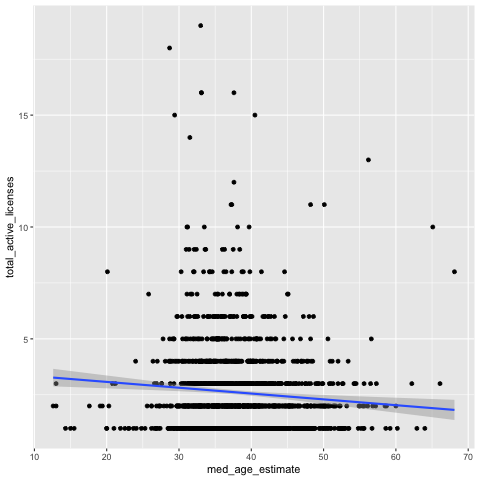

In [65]:
%%R -i df_merge

df <- df_merge

plt <- ggplot(df, aes(x = med_age_estimate, y = total_active_licenses)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(total_active_licenses ~ med_age_estimate, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_active_licenses ~ med_inc_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6116 -1.4444 -0.4964  0.6371 16.0141 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.064e+00  1.153e-01  17.906  < 2e-16 ***
med_inc_estimate 6.337e-06  1.229e-06   5.155 2.85e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.993 on 1637 degrees of freedom
Multiple R-squared:  0.01597,	Adjusted R-squared:  0.01537 
F-statistic: 26.57 on 1 and 1637 DF,  p-value: 2.849e-07



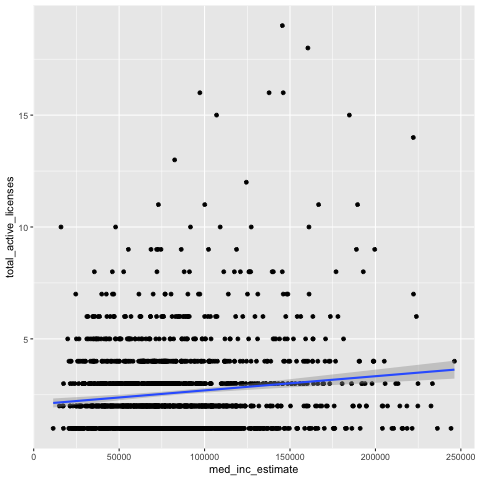

In [41]:
%%R 

plt <- ggplot(df, aes(x = med_inc_estimate, y = total_active_licenses)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(total_active_licenses ~ med_inc_estimate, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_active_licenses ~ med_inc_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6116 -1.4444 -0.4964  0.6371 16.0141 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.064e+00  1.153e-01  17.906  < 2e-16 ***
med_inc_estimate 6.337e-06  1.229e-06   5.155 2.85e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.993 on 1637 degrees of freedom
Multiple R-squared:  0.01597,	Adjusted R-squared:  0.01537 
F-statistic: 26.57 on 1 and 1637 DF,  p-value: 2.849e-07



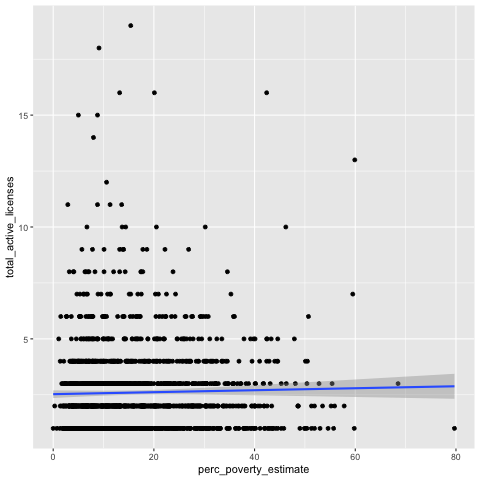

In [42]:
%%R 

plt <- ggplot(df, aes(x = perc_poverty_estimate, y = total_active_licenses)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(total_active_licenses ~ med_inc_estimate, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_active_licenses ~ perc_owners, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2120 -1.2097 -0.4824  0.6686 15.9940 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.212019   0.086349  37.198   <2e-16 ***
perc_owners -0.017634   0.002061  -8.557   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.966 on 1637 degrees of freedom
Multiple R-squared:  0.04281,	Adjusted R-squared:  0.04223 
F-statistic: 73.22 on 1 and 1637 DF,  p-value: < 2.2e-16



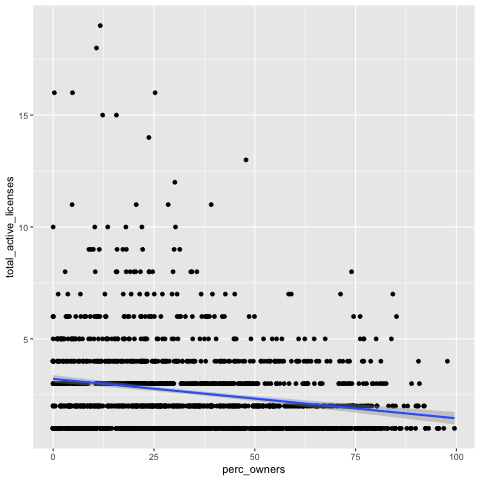

In [46]:
%%R 

plot <- ggplot(df, aes(x = perc_owners, y = total_active_licenses)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_active_licenses ~ perc_owners, data = df)
summary(model)

In [50]:
%%R

model <- lm(total_active_licenses ~ med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, data = df)
summary(model)


Call:
lm(formula = total_active_licenses ~ med_age_estimate + perc_poverty_estimate + 
    perc_owners + perc_ethnic, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8009 -1.2451 -0.4123  0.7199 15.7459 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.737558   0.376973   7.262 5.88e-13 ***
med_age_estimate      -0.001294   0.008444  -0.153  0.87826    
perc_poverty_estimate -0.014741   0.005288  -2.788  0.00537 ** 
perc_owners           -0.021917   0.002608  -8.403  < 2e-16 ***
perc_ethnic            0.011736   0.001889   6.212 6.62e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.933 on 1634 degrees of freedom
Multiple R-squared:  0.07566,	Adjusted R-squared:  0.0734 
F-statistic: 33.44 on 4 and 1634 DF,  p-value: < 2.2e-16



Two hypotheses here:

1. Tobacco shops just open along main roads and not nearer to residential areas
2. Tobacco shops are shunned from residential areas because NIMBY


Attaching package: ‘flexplot’

The following object is masked from ‘package:ggplot2’:

    flip_data



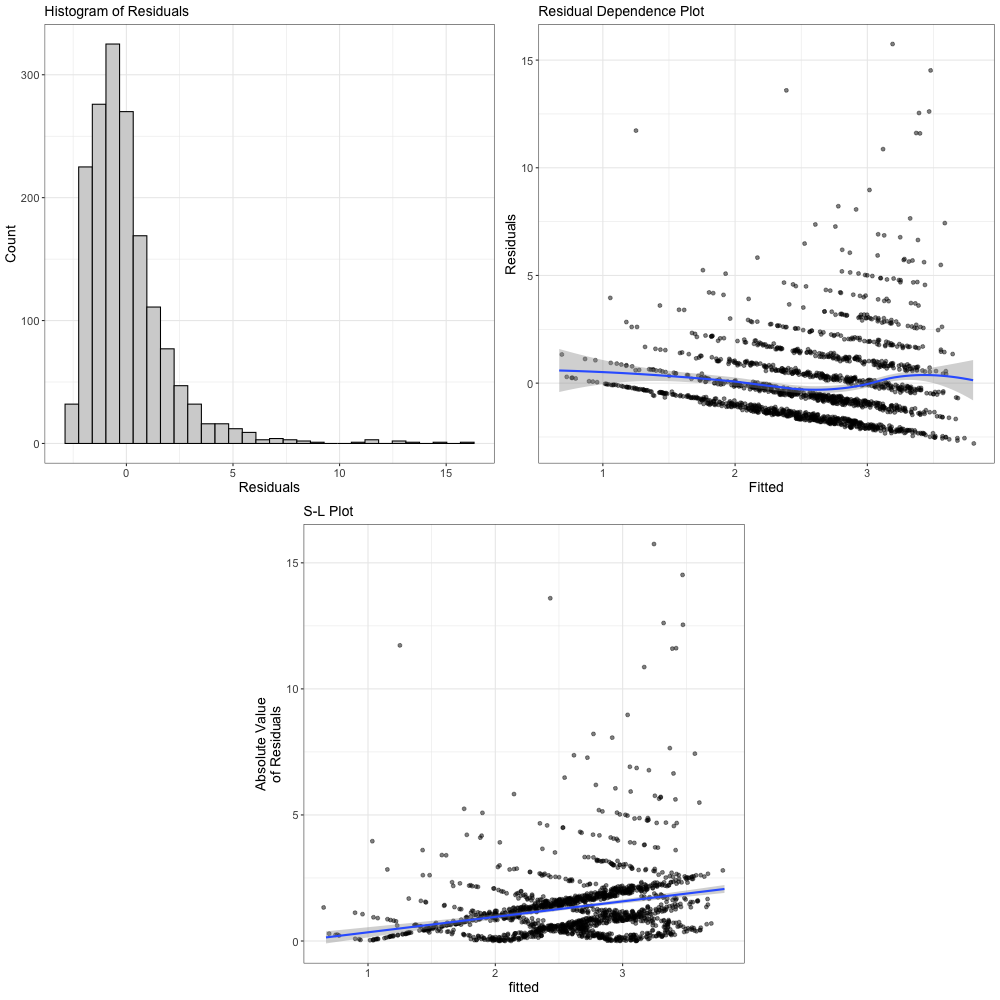

In [51]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")

In [66]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

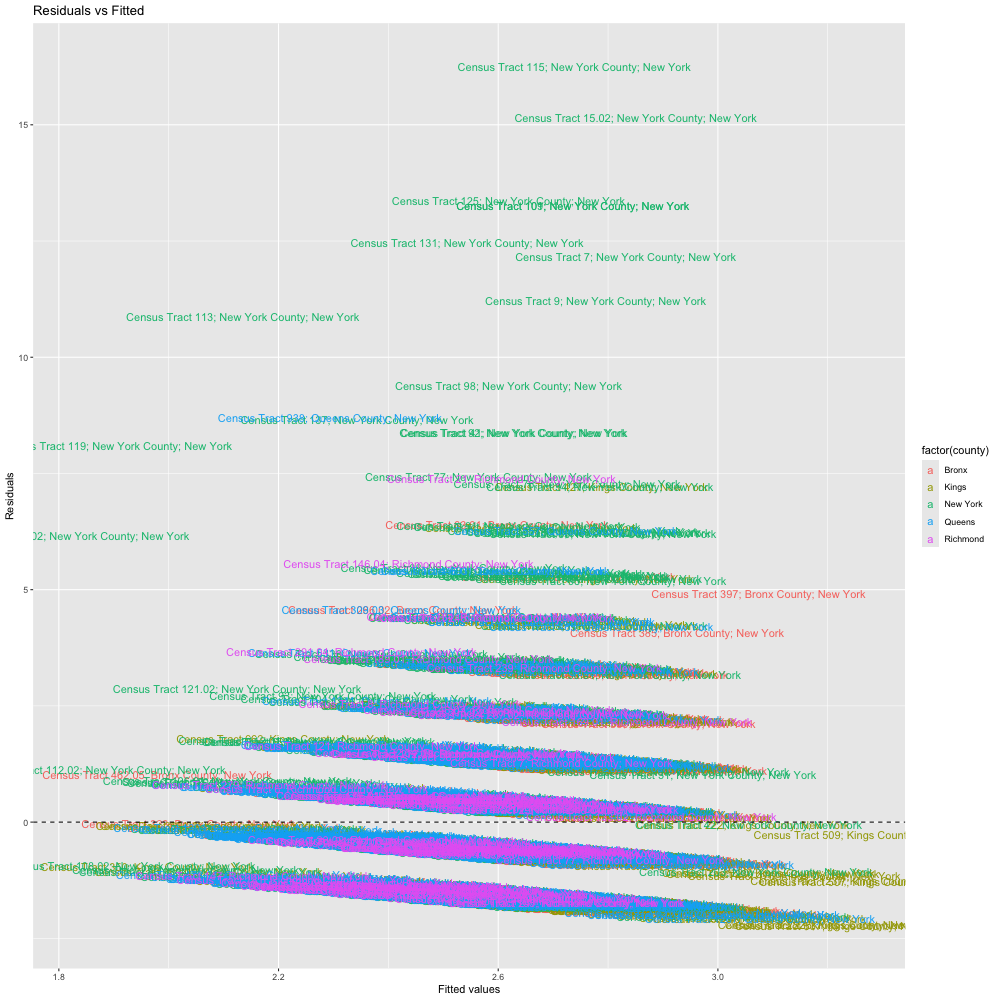

In [69]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=factor(county)) + 
    # geom_point() + 
    geom_text(aes(label = NAME)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

# poisson

In [70]:
%%R

model <- glm(total_active_licenses ~ med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, data = df, family="poisson")
summary(model)


Call:
glm(formula = total_active_licenses ~ med_age_estimate + perc_poverty_estimate + 
    perc_owners + perc_ethnic, family = "poisson", data = df)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.9277364  0.1245511   7.449 9.43e-14 ***
med_age_estimate      -0.0004086  0.0027260  -0.150  0.88085    
perc_poverty_estimate -0.0050117  0.0016847  -2.975  0.00293 ** 
perc_owners           -0.0088622  0.0008648 -10.248  < 2e-16 ***
perc_ethnic            0.0052358  0.0006817   7.680 1.59e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1965.5  on 1638  degrees of freedom
Residual deviance: 1762.3  on 1634  degrees of freedom
AIC: 6144.4

Number of Fisher Scoring iterations: 5

